1) Calculate from matrix <br>
2) Calculate $R^2$ <br>
3) Maybe plot with distingished data groups

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.options.display.max_rows = 10
#pd.set_option('display.max_rows', 10)

In [3]:
st = pd.read_excel('SampleData/logdataVpVs.xlsx') #use sample# as index column
st

,DEPTH,DTCO,DTSM,RHOZ
0,693.4200,156.0565,469.2656,4.5631
1,693.5724,155.0785,446.2663,4.5650
2,693.7248,153.8340,436.9780,4.5756
3,693.8772,151.9469,432.6328,4.5771
4,694.0296,150.8684,425.2656,4.5780
...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224
10965,2364.4860,108.0000,214.5455,2.3121
10966,2364.6384,108.0000,214.5455,2.2996
10967,2364.7908,108.0000,214.5455,2.2953


In [4]:
st2= st

In [5]:
indDTCO= st2.index[st2['DTCO'] < 0].tolist()

indDTSM= st2.index[st2['DTSM'] < 0].tolist()

indRHOZ= st2.index[st2['RHOZ'] > 3].tolist()

u_ind= indDTCO+ indDTSM+ indRHOZ

In [6]:
st2= st2.drop(u_ind)
st2

,DEPTH,DTCO,DTSM,RHOZ
50,701.0400,148.2507,432.6303,2.4790
51,701.1924,151.7425,434.2779,2.1707
52,701.3448,153.7459,434.4684,2.0793
53,701.4972,150.6211,434.4684,2.0716
54,701.6496,147.2354,433.6620,2.0753
...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224
10965,2364.4860,108.0000,214.5455,2.3121
10966,2364.6384,108.0000,214.5455,2.2996
10967,2364.7908,108.0000,214.5455,2.2953


In [7]:
st2['Vp(m_s)']= (1/ st2['DTCO'])* (0.3048/ 10**-6)
st2['Vs(m_s)']= (1/ st2['DTSM'])* (0.3048/ 10**-6)

Text(0.5, 0, 'Vs(m/s)')

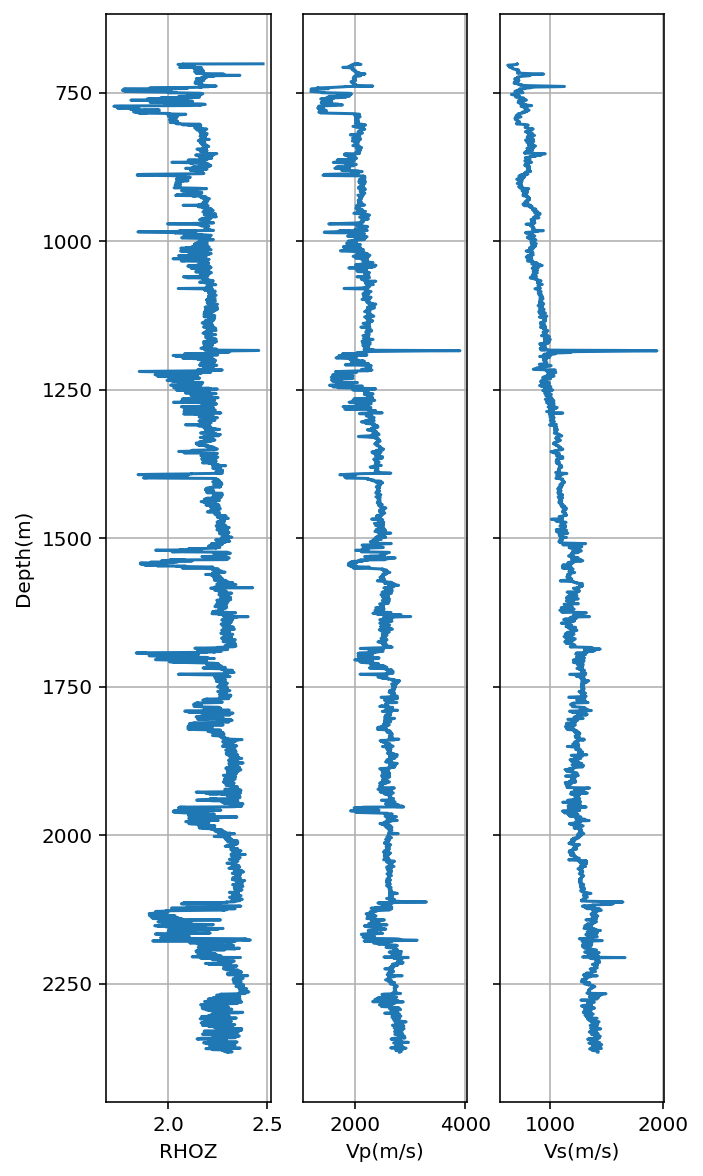

In [8]:
fig, ax_1 = plt.subplots(1,3,sharey=True)
fig.set_size_inches(5,10)

plt.sca(ax_1[0])
plt.plot(st2['RHOZ'], st2['DEPTH'])
plt.grid()
plt.ylabel('Depth(m)')
plt.xlabel('RHOZ')
#plt.ylim([1200,1250])
ax_1[0].invert_yaxis()

    
plt.sca(ax_1[1])
plt.plot(st2['Vp(m_s)'], st2['DEPTH'])
plt.grid()
plt.xlabel('Vp(m/s)')

plt.sca(ax_1[2])
plt.plot(st2['Vs(m_s)'], st2['DEPTH'])
plt.grid()
plt.xlabel('Vs(m/s)')

Mudrock Line   $Vp=1.16Vs+1360(m/s)$ 

In [9]:
st2['Mudrock']=1.16*st2['Vs(m_s)']+1360

function calculating best fit parameters $ y=mx+c $

In [10]:
from statistics import mean
def best_fit(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [11]:
m, b = best_fit(st2['Vs(m_s)'],st2['Vp(m_s)'])
print(m, b)

1.19832680357611 1045.4763555158838


In [12]:
regression_line = [(m*x)+b for x in st2['Vs(m_s)']]

In [13]:
z = np.polyfit(st2['Vs(m_s)'],st2['Vp(m_s)'], 1)
z

array([   1.1983268 , 1045.47635552])

In [14]:
regression_line_2= [(z[0]*x)+z[1] for x in st2['Vs(m_s)']]

In [15]:
st2['constant']= 1
X_T= np.array([st2['constant'], st2['Vs(m_s)']])
X= np.transpose(X_T)
y= np.array(st2['Vp(m_s)'])

In [16]:
XTX= np.dot(X_T, X)
XTy= np.dot(X_T, y)

In [17]:
B= np.linalg.solve(XTX, XTy)
B

array([1045.47635552,    1.1983268 ])

In [18]:
regression_line_3 = [(B[1]*x)+B[0] for x in st2['Vs(m_s)']]

In [19]:
gas_line= [(1.75*x) for x in st2['Vs(m_s)']]

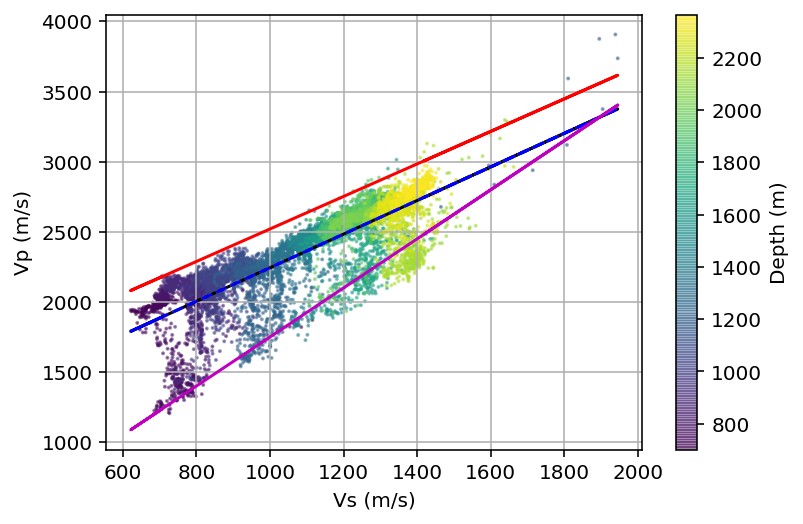

In [20]:
colors = st2['DEPTH']
plt.scatter(st2['Vs(m_s)'],st2['Vp(m_s)'], c=colors,s=1, alpha=0.5)
plt.plot(st2['Vs(m_s)'],st2['Mudrock'],'r')
plt.plot(st2['Vs(m_s)'],regression_line,'k')
plt.plot(st2['Vs(m_s)'],regression_line_2, ':y')
plt.plot(st2['Vs(m_s)'],regression_line_3, '--b')
plt.plot(st2['Vs(m_s)'],gas_line, 'm')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")
plt.grid()

$R^2 = \frac{\Sigma (\hat{y} + \bar{y})^2}{\Sigma (y_i + \bar{y})^2}$

In [21]:
#regression_line
#regression_line_2
y_mean= np.mean(st2['Vp(m_s)'])
#st2['Vp(m_s)']

R2_1= ((sum(regression_line)+ y_mean)**2)/ ((sum(st2['Vp(m_s)'])+ y_mean)**2)
R2_2= ((sum(regression_line_2)+ y_mean)**2)/ ((sum(st2['Vp(m_s)'])+ y_mean)**2)
R2_3= ((sum(regression_line_3)+ y_mean)**2)/ ((sum(st2['Vp(m_s)'])+ y_mean)**2)

print(R2_1, R2_2, R2_3)

0.9999999999999238 0.9999999999999238 0.9999999999999236


In [22]:
st3= st2

In [23]:
indVp= st3.index[st3['Vp(m_s)'] >= gas_line].tolist()

u_ind2= indVp
u_ind2

[50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,


In [24]:
st3= st3.drop(u_ind2)
st3

,DEPTH,DTCO,DTSM,RHOZ,Vp(m_s),Vs(m_s),Mudrock,constant
300,739.1400,155.3564,271.0057,2.1946,1961.940416,1124.699591,2664.651526,1
301,739.2924,162.8990,273.3004,2.1957,1871.098042,1115.256326,2653.697338,1
302,739.4448,167.3789,280.8587,2.2050,1821.018061,1085.243220,2618.882135,1
303,739.5972,167.1224,289.2223,2.1962,1823.812966,1053.860646,2582.478350,1
315,741.4260,216.3942,372.2309,1.9975,1408.540525,818.846582,2309.862035,1
...,...,...,...,...,...,...,...,...
10379,2275.1796,127.6895,215.2727,2.2070,2387.040438,1415.878558,3002.419127,1
10380,2275.3320,126.3105,217.1094,2.2306,2413.101049,1403.900522,2988.524606,1
10388,2276.5512,125.8555,220.0000,2.2114,2421.825029,1385.454545,2967.127273,1
10389,2276.7036,129.1282,220.6122,2.2012,2360.444891,1381.609902,2962.667486,1


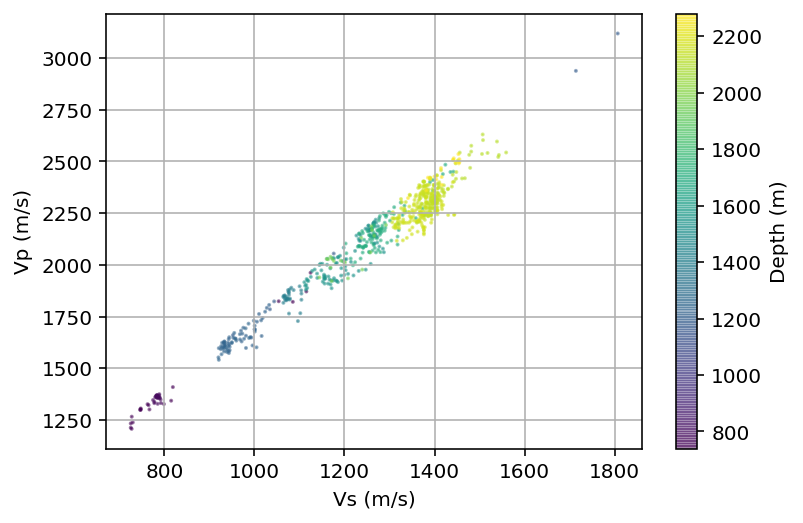

In [25]:
colors = st3['DEPTH']
plt.scatter(st3['Vs(m_s)'],st3['Vp(m_s)'], c=colors,s=1, alpha=0.5)
#plt.plot(st3['Vs(m_s)'],regression_line_4,'k')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")
plt.grid()

In [26]:
line_fit = np.polyfit(st3['Vs(m_s)'],st3['Vp(m_s)'], 1)
line_fit

array([  1.5972186, 105.8887814])

In [27]:
regression_line_4 = [(line_fit[0]*x)+line_fit[1] for x in st3['Vs(m_s)']]

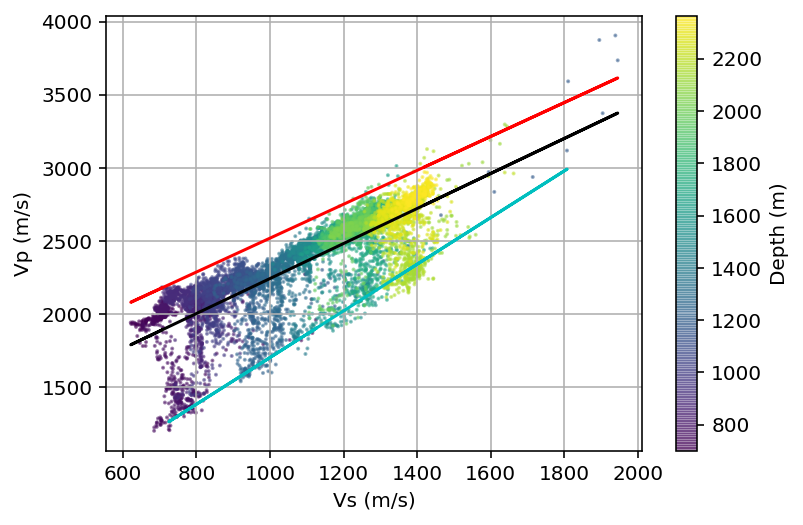

In [28]:
colors = st2['DEPTH']
plt.scatter(st2['Vs(m_s)'],st2['Vp(m_s)'], c=colors,s=1, alpha=0.5)
plt.plot(st2['Vs(m_s)'],st2['Mudrock'],'r')
plt.plot(st2['Vs(m_s)'],regression_line,'k')
plt.plot(st3['Vs(m_s)'],regression_line_4, 'c')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")
plt.grid()

In [29]:
st4= st2

In [30]:
st4['Vp/Vs']= st4['Vp(m_s)']/ st4['Vs(m_s)']
st4

,DEPTH,DTCO,DTSM,RHOZ,Vp(m_s),Vs(m_s),Mudrock,constant,Vp/Vs
50,701.0400,148.2507,432.6303,2.4790,2055.976801,704.527630,2177.252051,1,2.918234
51,701.1924,151.7425,434.2779,2.1707,2008.665997,701.854734,2174.151491,1,2.861940
52,701.3448,153.7459,434.4684,2.0793,1982.491891,701.546994,2173.794513,1,2.825886
53,701.4972,150.6211,434.4684,2.0716,2023.620861,701.546994,2173.794513,1,2.884512
54,701.6496,147.2354,433.6620,2.0753,2070.154324,702.851530,2175.307774,1,2.945365
...,...,...,...,...,...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224,2822.222222,1420.677665,3007.986092,1,1.986532
10965,2364.4860,108.0000,214.5455,2.3121,2822.222222,1420.677665,3007.986092,1,1.986532
10966,2364.6384,108.0000,214.5455,2.2996,2822.222222,1420.677665,3007.986092,1,1.986532
10967,2364.7908,108.0000,214.5455,2.2953,2822.222222,1420.677665,3007.986092,1,1.986532


In [31]:
indVp2= st4.index[st4['Vp/Vs'] > 1.75].tolist()

u_ind3= indVp2
u_ind3

[50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,


In [32]:
st4= st4.drop(u_ind3)
st4

,DEPTH,DTCO,DTSM,RHOZ,Vp(m_s),Vs(m_s),Mudrock,constant,Vp/Vs
300,739.1400,155.3564,271.0057,2.1946,1961.940416,1124.699591,2664.651526,1,1.744413
301,739.2924,162.8990,273.3004,2.1957,1871.098042,1115.256326,2653.697338,1,1.677729
302,739.4448,167.3789,280.8587,2.2050,1821.018061,1085.243220,2618.882135,1,1.677982
303,739.5972,167.1224,289.2223,2.1962,1823.812966,1053.860646,2582.478350,1,1.730602
315,741.4260,216.3942,372.2309,1.9975,1408.540525,818.846582,2309.862035,1,1.720152
...,...,...,...,...,...,...,...,...,...
10379,2275.1796,127.6895,215.2727,2.2070,2387.040438,1415.878558,3002.419127,1,1.685908
10380,2275.3320,126.3105,217.1094,2.2306,2413.101049,1403.900522,2988.524606,1,1.718855
10388,2276.5512,125.8555,220.0000,2.2114,2421.825029,1385.454545,2967.127273,1,1.748036
10389,2276.7036,129.1282,220.6122,2.2012,2360.444891,1381.609902,2962.667486,1,1.708474


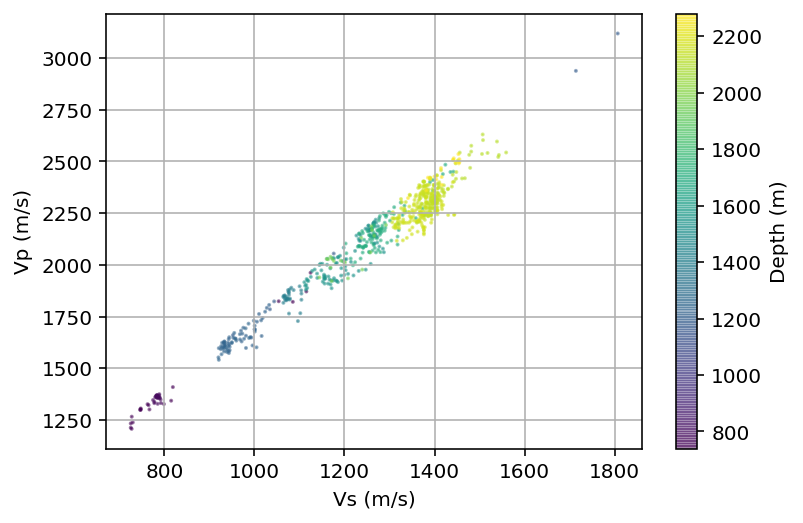

In [33]:
colors = st4['DEPTH']
plt.scatter(st4['Vs(m_s)'],st4['Vp(m_s)'], c=colors,s=1, alpha=0.5)
#plt.plot(st3['Vs(m_s)'],regression_line_4,'k')
cbar=plt.colorbar()
cbar.set_label('Depth (m)')
plt.xlabel("Vs (m/s)")
plt.ylabel("Vp (m/s)")
plt.grid()

In [34]:
line_fit = np.polyfit(st3['Vs(m_s)'],st3['Vp(m_s)'], 1)
line_fit

array([  1.5972186, 105.8887814])